<a href="https://colab.research.google.com/github/shamiya829/inventors-completion/blob/main/completion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('completion.csv')
data.head()

,Operator,Well Name,Formation,Lateral Length,Stages,Township,Range,Section,"Total Prop, lbs","Fluid, bbls",...,Latitude,Longitude,Fluid Type from DI,SPACING_CAPPED,12 month Cum Prod,Best1 Mo BOPD,Best3 Mo BOPD,Best6 Mo BOPD,Best9 Mo BOPD,Best12 Mo BOPD
0,Operator 1,Well 1,MBH,5114.0,30.0,141,99,10,0.0,16079.0,...,47.051150,-103.214580,NaN,660.00000,33.55,141.518738,127.690116,110.009862,97.351888,88.275258
1,Operator 1,Well 10,MBH,10626.0,1.0,142,99,2,0.0,26063.0,...,47.140451,-103.199177,NaN,660.00000,41.55,194.148586,157.867631,132.243042,115.965374,105.119987
2,Operator 4,Well 100,TFH,9167.0,28.0,139,100,13,1495508.0,55244.0,...,46.860587,-103.246291,NaN,660.00000,47.59,277.909270,227.701074,168.797940,141.215575,121.657900
3,Operator 7,Well 1000,MBH,9969.0,1.0,142,97,7,954000.0,10225.0,...,47.138904,-103.031277,NaN,660.00000,10.01,55.621302,44.641683,35.481043,29.750164,25.860180
4,Operator 4,Well 10000,TFH,9008.0,23.0,154,98,33,3129000.0,51287.0,...,48.112033,-103.294140,SW-XL HYBRID,202.19094,86.55,NaN,NaN,NaN,NaN,NaN


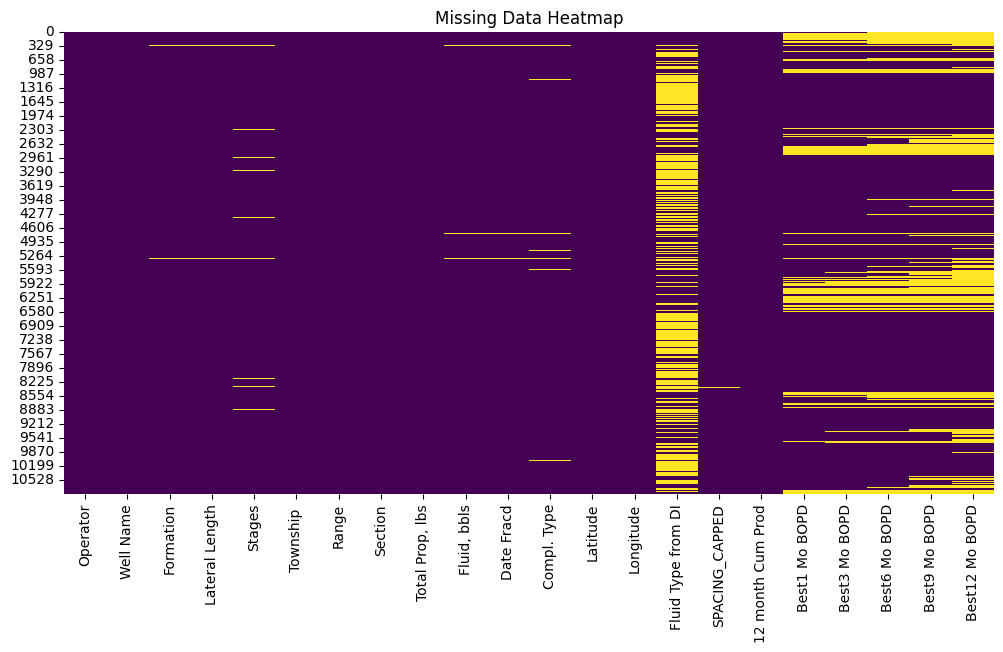

In [5]:
# missing data heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

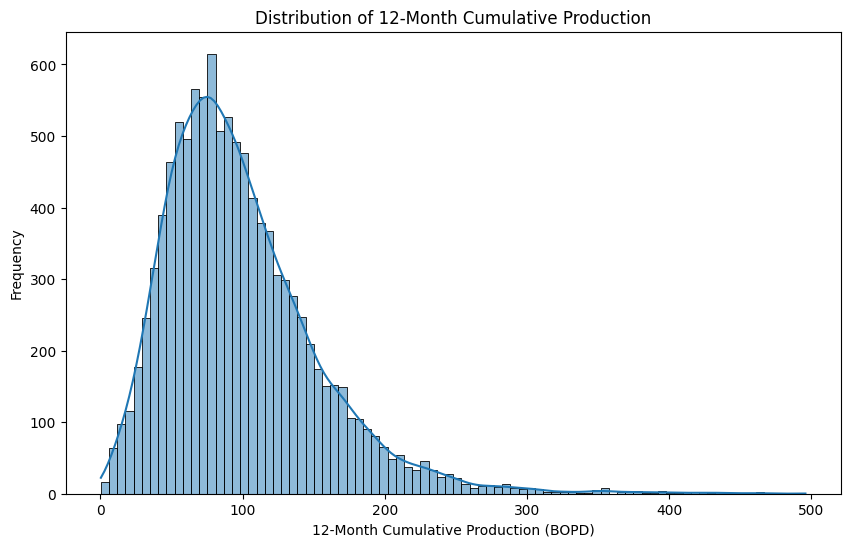

In [6]:
data_clean = data.dropna(subset=['12 month Cum Prod', 'Fluid, bbls', 'Total Prop, lbs', 'Stages'])

# Exploratory Data Analysis (EDA)
# Distribution of 12 month cumulative production
plt.figure(figsize=(10, 6))
sns.histplot(data_clean['12 month Cum Prod'], kde=True)
plt.title('Distribution of 12-Month Cumulative Production')
plt.xlabel('12-Month Cumulative Production (BOPD)')
plt.ylabel('Frequency')
plt.show()

In [7]:
import plotly.express as px

# Create a 3D scatter plot for Latitude, Longitude, and 12 month Cumulative Production
fig = px.scatter_3d(
    data_clean,
    x='Longitude',
    y='Latitude',
    z='12 month Cum Prod',
    color='12 month Cum Prod',
    labels={'Longitude': 'Longitude', 'Latitude': 'Latitude', '12 month Cum Prod': '12-Month Cumulative Production (BOPD)'},
    title="3D Visualization of Well Location and Production"
)

# Show the plot
fig.show()

In [17]:
# prompt: plot only top 10%

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ... (your existing code)

# Calculate the 90th percentile of '12 month Cum Prod'
percentile_90 = data_clean['12 month Cum Prod'].quantile(0.9)

# Filter the DataFrame to include only the top 10%
top_10_percent = data_clean[data_clean['12 month Cum Prod'] >= percentile_90]

# Create a 3D scatter plot for the top 10%
fig = px.scatter_3d(
    top_10_percent,
    x='Longitude',
    y='Latitude',
    z='12 month Cum Prod',
    color='12 month Cum Prod',
    labels={'Longitude': 'Longitude', 'Latitude': 'Latitude', '12 month Cum Prod': '12-Month Cumulative Production (BOPD)'},
    title="3D Visualization of Top 10% Well Location and Production"
)

# Show the plot
fig.show()


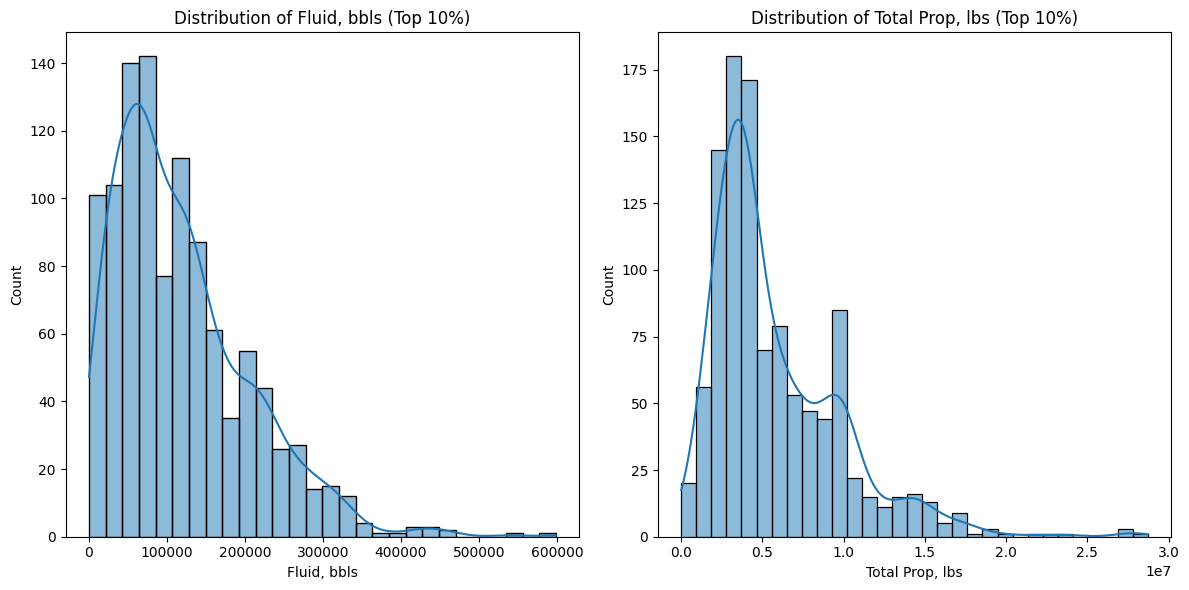

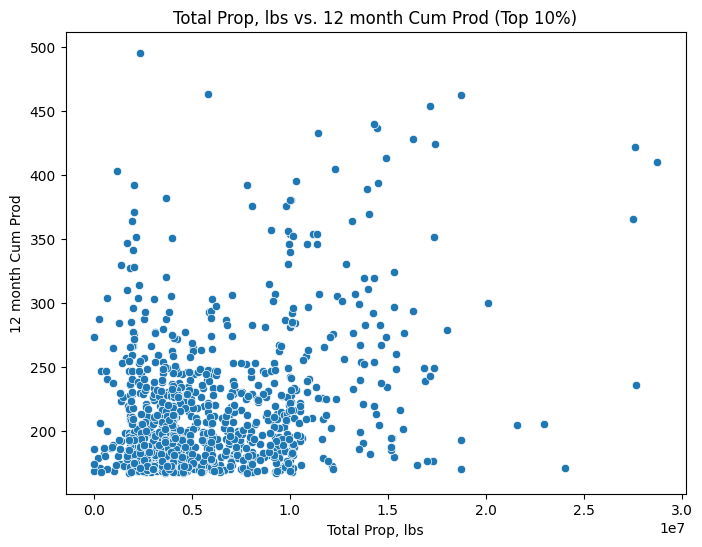

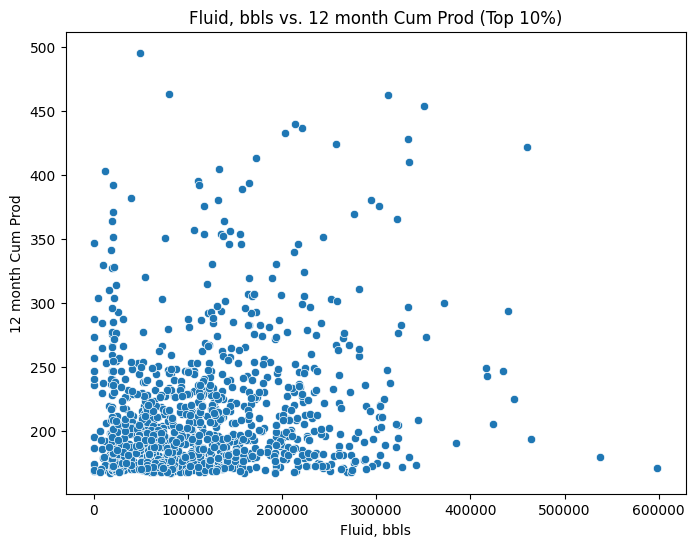

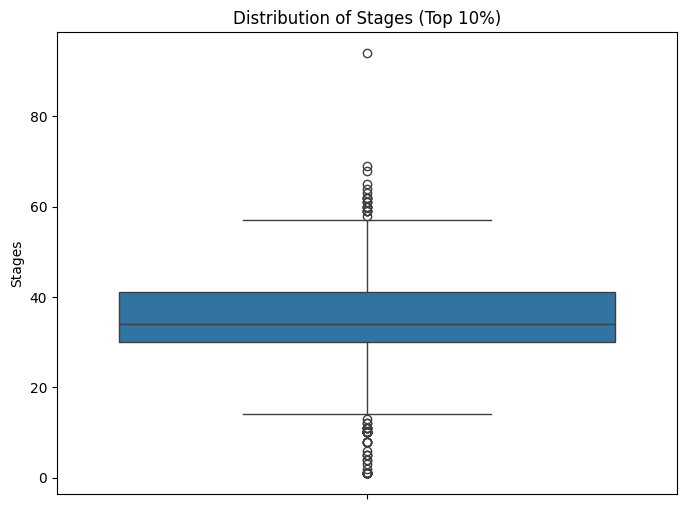

In [18]:
# prompt: write visual characteristics of the top 10% of wells

import matplotlib.pyplot as plt
# ... (your existing code)

# Calculate the 90th percentile of '12 month Cum Prod'
percentile_90 = data_clean['12 month Cum Prod'].quantile(0.9)

# Filter the DataFrame to include only the top 10%
top_10_percent = data_clean[data_clean['12 month Cum Prod'] >= percentile_90]

# Visualizations for the top 10%
# 1. Distribution of key features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(top_10_percent['Fluid, bbls'], kde=True)
plt.title('Distribution of Fluid, bbls (Top 10%)')
plt.subplot(1, 2, 2)
sns.histplot(top_10_percent['Total Prop, lbs'], kde=True)
plt.title('Distribution of Total Prop, lbs (Top 10%)')
plt.tight_layout()
plt.show()

# 2. Relationship between Total Prop, lbs and 12 month Cum Prod
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total Prop, lbs', y='12 month Cum Prod', data=top_10_percent)
plt.title('Total Prop, lbs vs. 12 month Cum Prod (Top 10%)')
plt.show()

# 3. Relationship between Fluid, bbls and 12 month Cum Prod
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Fluid, bbls', y='12 month Cum Prod', data=top_10_percent)
plt.title('Fluid, bbls vs. 12 month Cum Prod (Top 10%)')
plt.show()

# 4. Boxplot of 'Stages' for the top 10%
plt.figure(figsize=(8, 6))
sns.boxplot(y='Stages', data=top_10_percent)
plt.title('Distribution of Stages (Top 10%)')
plt.show()

# 5. 3D scatter plot (already included in your original code)
fig = px.scatter_3d(
    top_10_percent,
    x='Longitude',
    y='Latitude',
    z='12 month Cum Prod',
    color='12 month Cum Prod',
    labels={'Longitude': 'Longitude', 'Latitude': 'Latitude', '12 month Cum Prod': '12-Month Cumulative Production (BOPD)'},
    title="3D Visualization of Top 10% Well Location and Production"
)

fig.show()


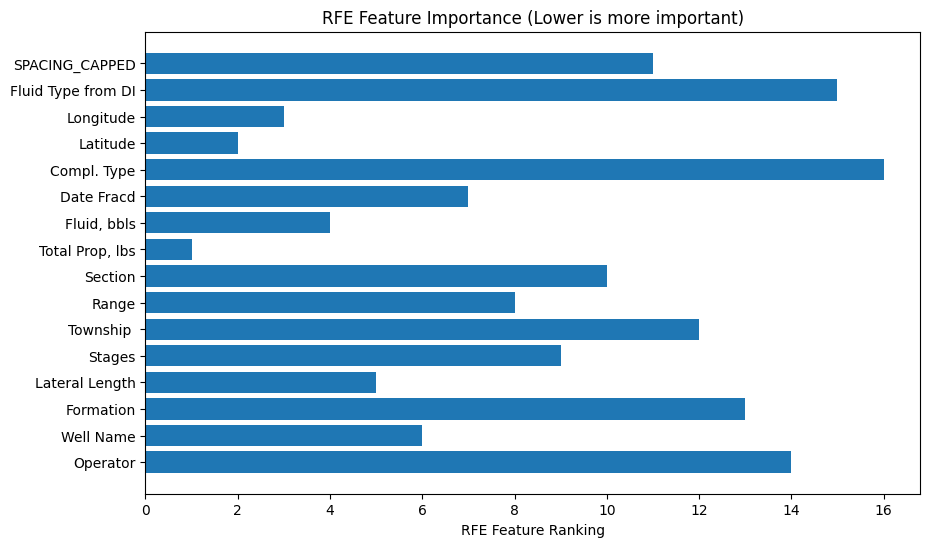

{'Linear Regression': {'MSE': 1678.6482988099754,
  'MAE': 31.43174530392231,
  'RMSE': 40.9713106796692,
  'R2': 0.3542151640111928},
 'Random Forest': {'MSE': 844.7759334056799,
  'MAE': 21.3735188,
  'RMSE': 29.065029389382698,
  'R2': 0.675010252005483},
 'SVR': {'MSE': 2226.125327496193,
  'MAE': 33.92412172872771,
  'RMSE': 47.181832600018765,
  'R2': 0.1435978694722423},
 'Gradient Boosting': {'MSE': 849.6454144152787,
  'MAE': 21.796006281909065,
  'RMSE': 29.148677747288616,
  'R2': 0.6731369370309505},
 'XGBoost': {'MSE': 871.5053066927603,
  'MAE': 21.43299208831787,
  'RMSE': 29.521268717532454,
  'R2': 0.6647273214139364},
 'K-Nearest Neighbors': {'MSE': 2158.735246544,
  'MAE': 33.712176,
  'RMSE': 46.46219158137076,
  'R2': 0.16952318831707514}}

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import xgboost as xgb

# Load the dataset
data_clean = pd.read_csv('completion.csv')

# Drop NA values
data_clean = data_clean.dropna()

# Define features (X) as all columns except the last 6 columns
X = data_clean.iloc[:, :-6]

# Define the target (y) as the last column (12 month Cum Prod)
y = data_clean['12 month Cum Prod']

# Encode categorical variables
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))
    label_encoders[column] = le

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": xgb.XGBRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Train and evaluate each model
model_results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model using multiple metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mse**0.5
    r2 = r2_score(y_test, y_pred)

    model_results[model_name] = {'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'R2': r2}

# Perform Recursive Feature Elimination (RFE) using RandomForestRegressor
rf_model = RandomForestRegressor()
selector = RFE(rf_model, n_features_to_select=1)
selector = selector.fit(X_train, y_train)

# Get the ranking of features (lower ranking means more important)
ranking = selector.ranking_

# Visualize the RFE results (Feature Importance)
plt.figure(figsize=(10, 6))
plt.barh(range(len(ranking)), ranking, align='center')
plt.yticks(range(len(ranking)), X.columns)
plt.xlabel('RFE Feature Ranking')
plt.title('RFE Feature Importance (Lower is more important)')
plt.show()

# Output the model results
model_results
